In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread, imresize
import glob

In [2]:
%matplotlib inline
sns.set_context("poster")

In [3]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
path = "camera_calibration"
from os import listdir
from os.path import isfile, join
onlyfiles = sorted([int(f.split(".")[0]) for f in listdir(path) if isfile(join(path, f))])[200:]
images = ["camera_calibration/{}.jpg".format(x) for x in onlyfiles if x % 30 == 0]

In [4]:
len(images)

85

In [5]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


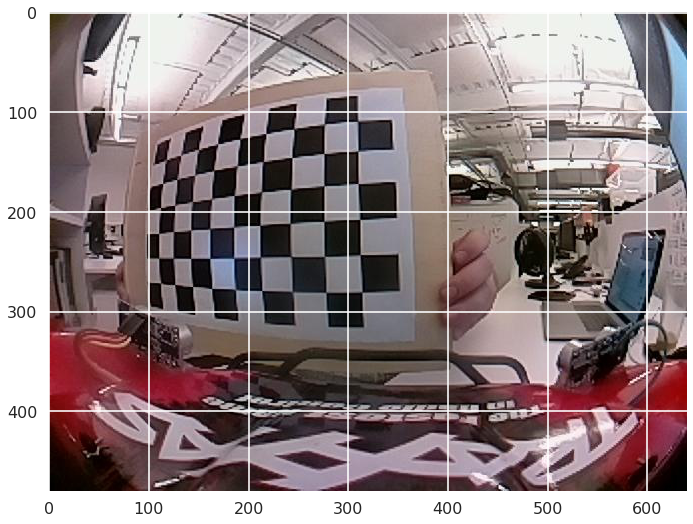

In [6]:
img = imread("camera_calibration/{}.jpg".format(onlyfiles[0]))
plt.imshow(img)

In [7]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for i, fname in enumerate(images):
    print('processing', i, fname)
    img = imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, True)

    if ret:
        print('FOUND corners!')
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        


processing 0 camera_calibration/210.jpg
FOUND corners!
processing 1 camera_calibration/240.jpg
FOUND corners!
processing 2 camera_calibration/270.jpg
FOUND corners!
processing 3 camera_calibration/300.jpg
processing 4 camera_calibration/330.jpg
processing 5 camera_calibration/360.jpg
processing 6 camera_calibration/390.jpg
processing 7 camera_calibration/420.jpg
processing 8 camera_calibration/450.jpg
processing 9 camera_calibration/480.jpg
FOUND corners!
processing 10 camera_calibration/510.jpg
FOUND corners!
processing 11 camera_calibration/540.jpg
FOUND corners!
processing 12 camera_calibration/570.jpg
processing 13 camera_calibration/600.jpg
processing 14 camera_calibration/630.jpg
processing 15 camera_calibration/660.jpg
processing 16 camera_calibration/690.jpg
processing 17 camera_calibration/720.jpg
processing 18 camera_calibration/750.jpg
FOUND corners!
processing 19 camera_calibration/780.jpg
FOUND corners!
processing 20 camera_calibration/810.jpg
FOUND corners!
processing 21 

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[0:2],None,None)

In [9]:
img = imread("{}".format(images[70]))

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


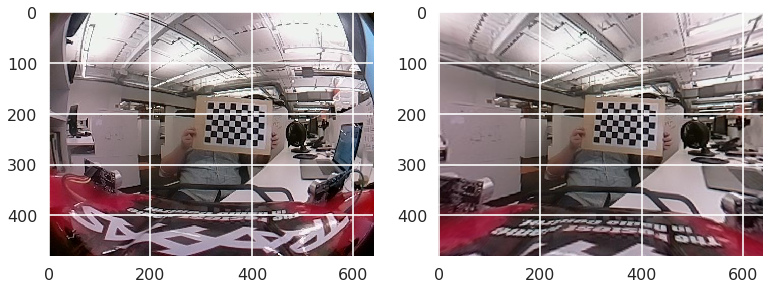

In [10]:
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
undistort = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undistort)

In [11]:
calibration_data = {
    "mtx": mtx,
    "camera_mtx": newcameramtx,
    "dist": dist
}

In [12]:
with open("fisheye_f1p8_camera_calibration.pkl", 'wb') as f:
    pickle.dump(calibration_data, f)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


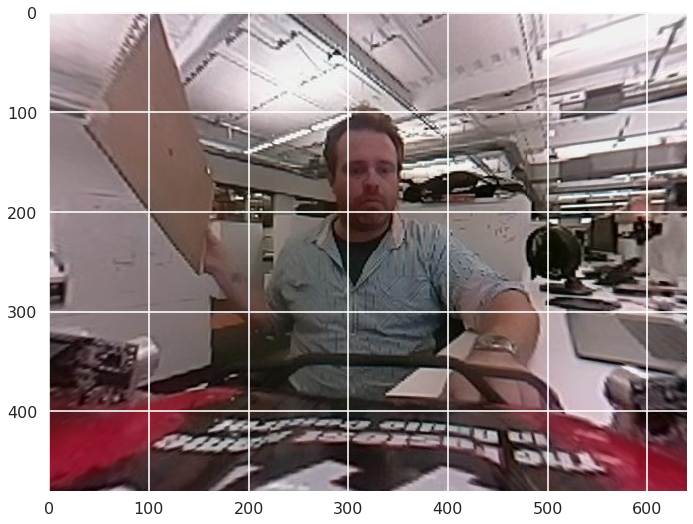

In [13]:

img = imread("{}".format(images[i]))
undistort = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undistort)
i += 1